In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from math import exp
%matplotlib inline

In [3]:
sigma = 20
eps = 1e-1

def w(deltaT):
    return exp(-deltaT**2/(2*sigma**2))

def process_image(filename):
    img = cv2.imread(filename).astype(np.uint8)
    x, y, _ = img.nonzero()
    p = np.transpose(np.array([x, y], dtype=np.uint16))
    m, ev = cv2.PCACompute(p, None, cv2.PCA_DATA_AS_COL)
    proj = cv2.PCAProject(p, m, ev)
    line_proj = np.ndarray((0, 2))
    
    proj.view('float32,float32').sort(order=['f0'], axis=0)
    mnT = proj[0][0]
    mxT = proj[-1][0]
    l = 0
    r = 1
    
    for t in np.linspace(mnT, mxT, 100):
        while r < len(proj) and w(t-proj[r][0]) > eps: 
            r += 1
        while l+1 < r and w(t-proj[l][0]) < eps:
            l += 1
        
        deltas = t - proj[l:r, 0]
        weights = np.array([w(delta) for delta in deltas])
        weights = np.nan_to_num(weights)
        ds = proj[l:r, 1]
        line_proj = np.append(line_proj, [[t, np.average(ds, weights=weights)]], axis=0)
        
    line = cv2.PCABackProject(line_proj, m, ev)
    for i in range(1, len(line)):
        img = cv2.line(img, (line[i-1][1], line[i-1][0]), (line[i][1], line[i][0]), (255, 0, 0), 3)
    plt.imshow(img)

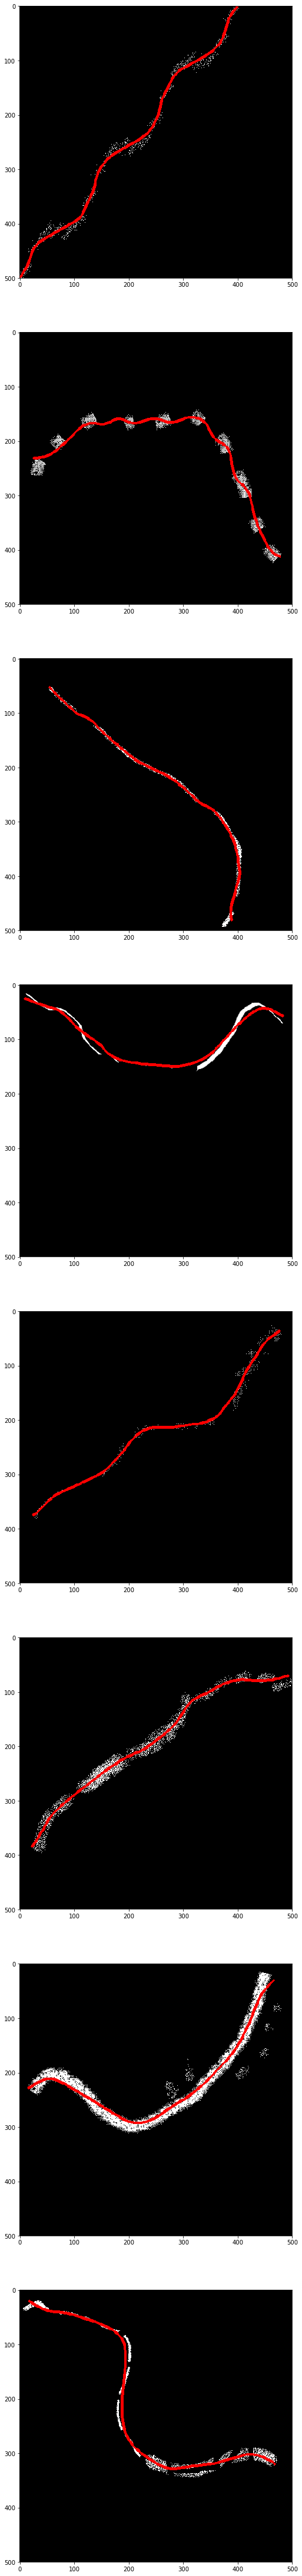

In [4]:
plt.figure(1, figsize=(160, 80))
plt.axis('off')
for i in range(8):
    plt.subplot(8, 1, i+1)
    process_image('./data/task1/{}.tif'.format(i+1))
plt.show()